In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv("final_data.csv")
dataframe = dataframe.drop(dataframe.columns[0], axis=1)
dataframe = dataframe.sample(frac=1)
dataframe

,Date time,Duration of the flow,Source IP,Destination IP,Source Port,Destination Port,Protocol,Flag,Forwarding status,Type of Service (ToS) byte,Packets exchanged,Bytes exchanged,label
9475661,2016-04-11 13:25:39,3.812,71.62.178.235,42.219.156.231,22,60309,TCP,.APRS.,0,40,17,1764,anomaly-sshscan
8844971,2016-04-11 10:19:20,3.400,42.219.156.231,71.62.176.131,57598,22,TCP,.AP.SF,0,0,12,1253,anomaly-sshscan
2638764,2016-04-15 14:57:42,0.396,108.66.255.199,42.219.156.213,25,52145,TCP,.AP.SF,0,72,3,230,anomaly-spam
7057604,2016-04-11 01:24:54,3.892,71.62.186.85,42.219.156.231,22,39056,TCP,.APRS.,0,40,17,1764,anomaly-sshscan
9558287,2016-04-11 13:51:45,3.532,42.219.156.231,71.62.178.190,53051,22,TCP,.AP.SF,0,0,12,1253,anomaly-sshscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989559,2016-04-12 04:52:13,0.000,42.219.158.188,74.158.28.179,80,37574,TCP,.A...F,0,0,1,40,blacklist
4780267,2016-04-13 20:58:40,1.044,106.150.228.56,42.219.158.188,20560,80,TCP,.AP.S.,0,42,4,1091,blacklist
9029337,2016-04-11 11:13:23,3.400,42.219.156.231,71.62.176.194,42271,22,TCP,.AP.SF,0,0,13,1317,anomaly-sshscan
5694498,2016-04-16 05:40:20,0.056,165.1.200.240,42.219.158.188,53530,22,TCP,.AP...,0,8,2,168,blacklist


In [3]:
num_rows = dataframe.shape[0]
five_percent = round((num_rows / 100) * 5)
dataframe = dataframe[:five_percent]
dataframe

,Date time,Duration of the flow,Source IP,Destination IP,Source Port,Destination Port,Protocol,Flag,Forwarding status,Type of Service (ToS) byte,Packets exchanged,Bytes exchanged,label
9475661,2016-04-11 13:25:39,3.812,71.62.178.235,42.219.156.231,22,60309,TCP,.APRS.,0,40,17,1764,anomaly-sshscan
8844971,2016-04-11 10:19:20,3.400,42.219.156.231,71.62.176.131,57598,22,TCP,.AP.SF,0,0,12,1253,anomaly-sshscan
2638764,2016-04-15 14:57:42,0.396,108.66.255.199,42.219.156.213,25,52145,TCP,.AP.SF,0,72,3,230,anomaly-spam
7057604,2016-04-11 01:24:54,3.892,71.62.186.85,42.219.156.231,22,39056,TCP,.APRS.,0,40,17,1764,anomaly-sshscan
9558287,2016-04-11 13:51:45,3.532,42.219.156.231,71.62.178.190,53051,22,TCP,.AP.SF,0,0,12,1253,anomaly-sshscan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9642706,2016-04-11 14:18:30,3.864,42.219.156.231,71.62.179.103,53746,22,TCP,.AP.SF,0,0,14,1357,anomaly-sshscan
9553040,2016-04-11 13:50:05,5.760,71.62.177.249,42.219.156.231,22,58973,TCP,.AP.SF,0,40,18,2039,anomaly-sshscan
1989182,2016-04-15 14:20:04,0.176,108.66.255.250,42.219.156.212,25,56525,TCP,.AP.SF,0,72,3,230,anomaly-spam
1398129,2016-04-11 20:03:56,1.136,108.66.255.199,42.219.156.223,25,43888,TCP,.AP.SF,0,72,3,230,anomaly-spam


In [5]:
features = dataframe.get(["Source IP", "Destination Port", "Forwarding status", "Packets exchanged"
               ,"Bytes exchanged"])

label = dataframe.get('label')

In [6]:
features

,Source IP,Destination Port,Forwarding status,Packets exchanged,Bytes exchanged
4921626,42.219.158.188,53,0,1,74
4514965,42.219.154.142,38772,0,13,11997
4087374,54.143.54.77,80,0,10,400
1488475,42.219.156.223,25,0,8,432
4092149,42.219.158.188,53,0,1,78
...,...,...,...,...,...
6977154,42.219.156.231,22,0,15,1433
2036190,42.219.156.215,25,0,4,216
439421,108.66.255.194,48601,0,3,230
4639777,42.219.158.188,11030,0,26,13108


In [7]:
label

4921626          blacklist
4514965          blacklist
4087374          blacklist
1488475       anomaly-spam
4092149          blacklist
                ...       
6977154    anomaly-sshscan
2036190       anomaly-spam
439421        anomaly-spam
4639777          blacklist
4461031          blacklist
Name: label, Length: 502138, dtype: object

In [8]:
enc = OneHotEncoder()
preprocessed_features = enc.fit_transform(features)
preprocessed_features

<502138x81198 sparse matrix of type '<class 'numpy.float64'>'
	with 2510690 stored elements in Compressed Sparse Row format>

In [16]:
def ModelLearning(X, y, number_of_estimators):
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create different models based on max_depth
    for k, estimator in enumerate(number_of_estimators):

        # Create a Decision tree Classifier at max_depth = depth
        classifier = AdaBoostClassifier(n_estimators= estimator)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv = cv, train_sizes = train_sizes)

        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')

        # Labels
        ax.set_title('Number of Estimators = %s'%(estimator))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('AdaBoost Model Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(X, y):
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    n_estimators = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(AdaBoostClassifier(), X, y,
        param_name = "n_estimators", param_range = n_estimators, cv = cv)

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('AdaBoost Classifier Model Complexity Performance')
    plt.plot(n_estimators, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(n_estimators, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(n_estimators, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(n_estimators, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Number of Estimators')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()


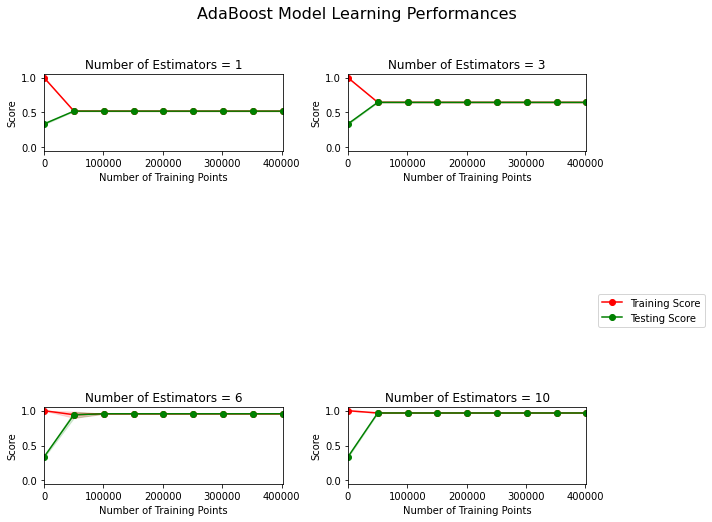

In [15]:
ModelLearning(preprocessed_features, label, [1, 3, 6, 10])

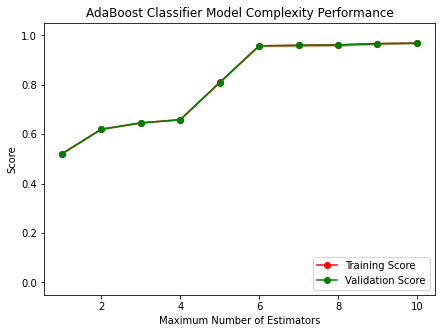

In [17]:
ModelComplexity(preprocessed_features, label)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(preprocessed_features, label, test_size=0.2, random_state=42)

In [10]:
classifier = AdaBoostClassifier(n_estimators=6)

In [12]:
start = time.time()
classifier.fit(x_train, y_train)
stop = time.time()
classifier.score(x_test, y_test)

0.9551818218026845

In [19]:
testing_accuracy = round(classifier.score(x_test, y_test), 3) * 100

print("Time taken for Training: {} seconds.".format(round(stop - start)))
print("Testing Accuracy: {}%".format(testing_accuracy) )

Time taken for Training: 45 seconds.
Testing Accuracy: 95.5%


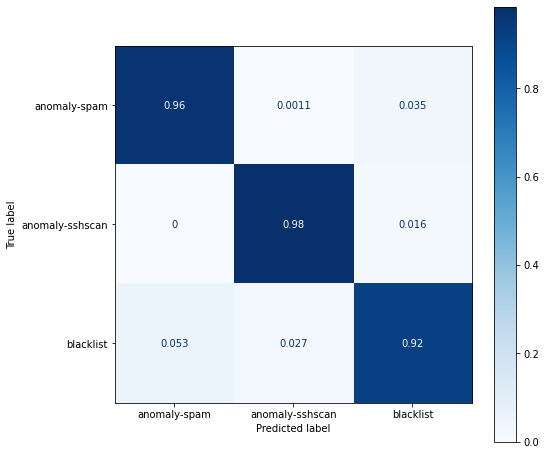

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(classifier, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()